In [47]:
FRAME_SIZE = 150
HOP_RATIO = 0.1
N_FFT = 1024
VIGILANCE = 1.4

In [48]:
from modules.AudioProcessor import AudioProcessor

audio_files = [
    './dataset/trimmed_crowd_talking.mp3',
    './dataset/trimmed_motor_riding.mp3',
    './dataset/trimmed_water_flowing.mp3'
]
ap = AudioProcessor(
    audio_files, 
    frame_size_ms=FRAME_SIZE, 
    hop_length_ratio=HOP_RATIO
    )
print(ap.frames.shape)
print(ap.class_ids.shape)
print(ap.timestamps.shape)

torch.Size([23973, 7200])
(23973,)
(23973,)


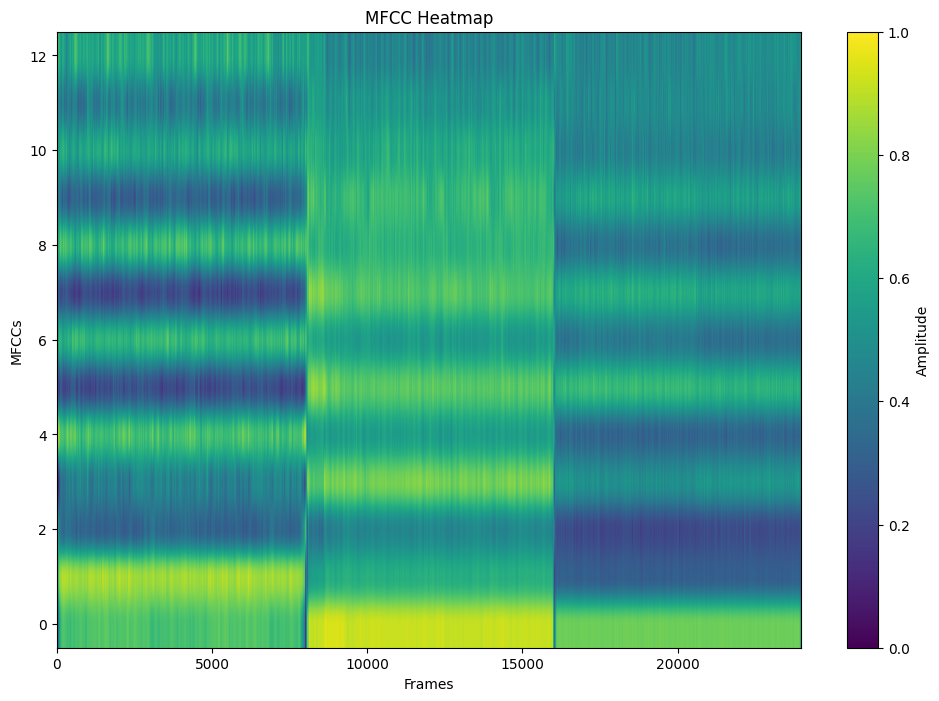

torch.Size([23973, 13])

In [49]:
from modules.FeatureExtractor import FeatureExtractor

fe = FeatureExtractor(n_fft=N_FFT)
fe.extract_mfcc(ap.frames)
fe.plot_mfccs()
fe.mfcc_features.shape

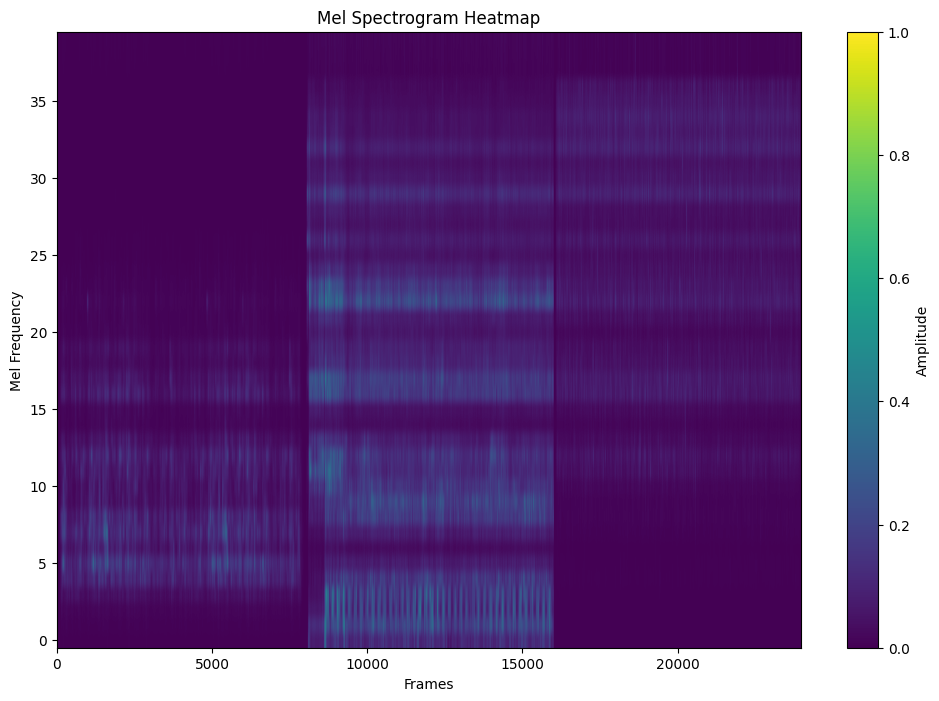

torch.Size([23973, 40])

In [50]:
fe.extract_melspectrogram(ap.frames)
fe.plot_melspectrogram()
fe.melspectrogram_features.shape

In [51]:
important_mfcc_features = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
important_mfsc_features = [i for i in range(14)] + [i for i in range(16, 35)]
n_features = len(important_mfcc_features) + len(important_mfsc_features)

import importlib
import modules.DatasetHandler
importlib.reload(modules.DatasetHandler)
from modules.DatasetHandler import DatasetHandler

dh = DatasetHandler(
    ap.class_ids,
    ap.timestamps, 
    fe.mfcc_features, 
    fe.melspectrogram_features, 
    len(important_mfcc_features) + len(important_mfsc_features)
)
dh.generate_all_features_csv()
dh.save_selected_features(important_mfcc_features, important_mfsc_features)

time_series_tensor = dh.generate_time_series(FRAME_SIZE, HOP_RATIO)

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[ 194    0 2454    0    0    0    0    0    0    0    1    0]
 [  45 2589    3    3    4    0    0   15    1    1    0    0]
 [2557    0    0    0  130    1    1    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]]
0.95


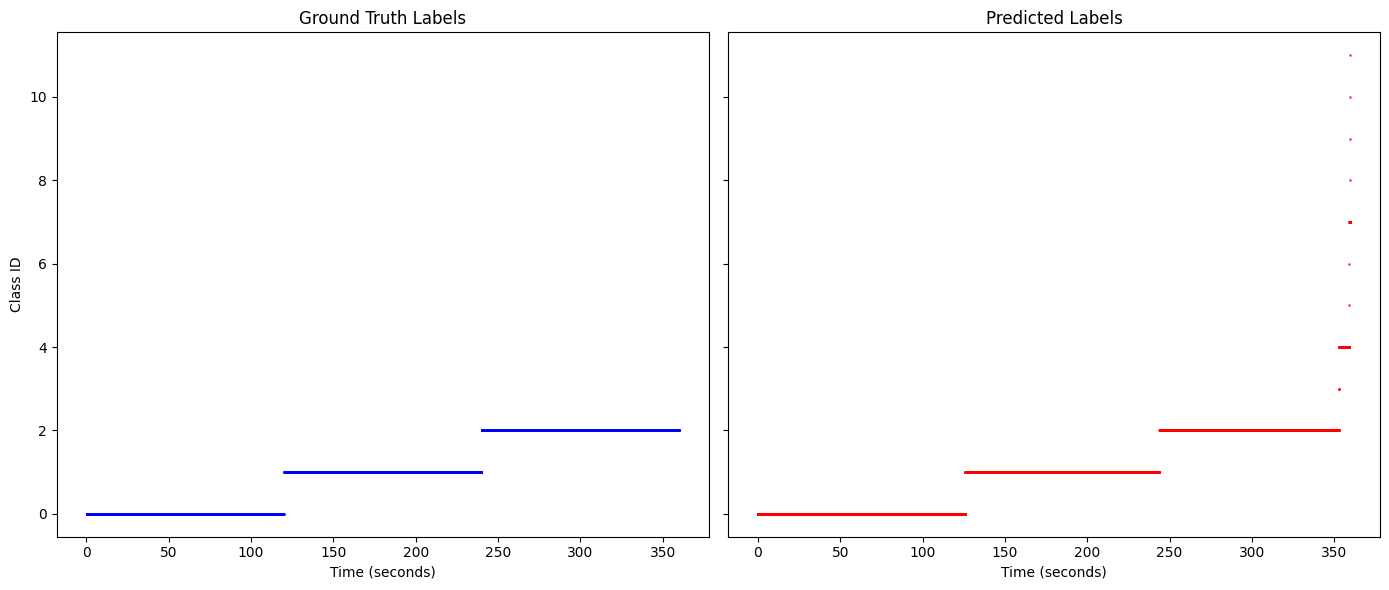

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[   0  403    0    0 2236    0    0    0    0    0    0]
 [2657   20    1    4    0    0    0    0    0    0    1]
 [   4 2641    2    0    0    2    3   23    1    2    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
0.94175


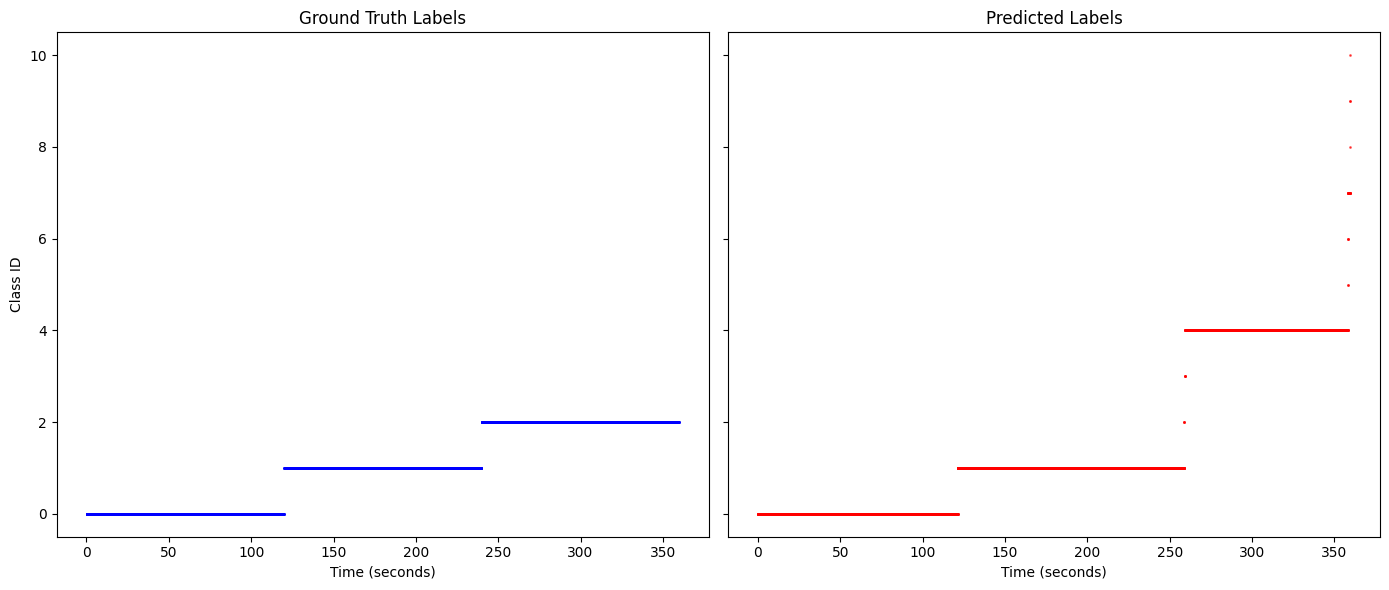

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[1608    0    0    0    0    0    0    0 1099    0    0]
 [ 132    2 1954  502    2    0    0    0    0    1    2]
 [1495 1192    6    0    0    1    3    1    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
0.59425


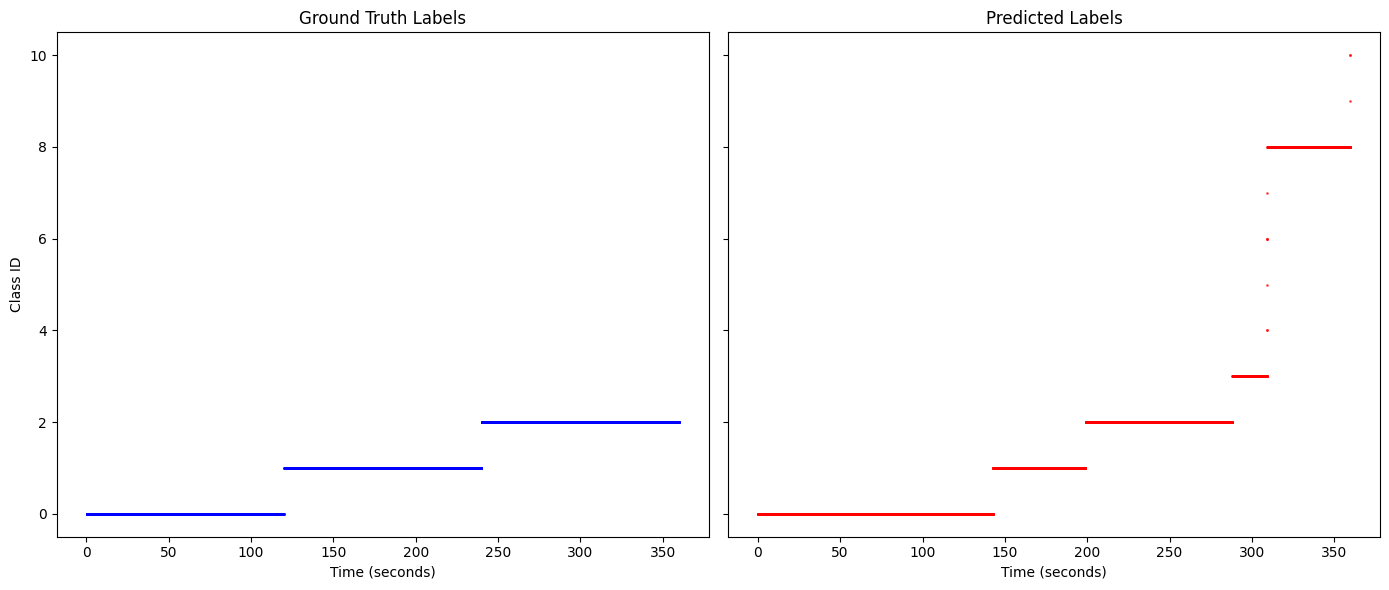

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[  63 2658    0    0    0    0    0    0]
 [ 166    9    1 2436   12    1    0    0]
 [2628    0   24    0    0    0    1    1]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]
0.96525


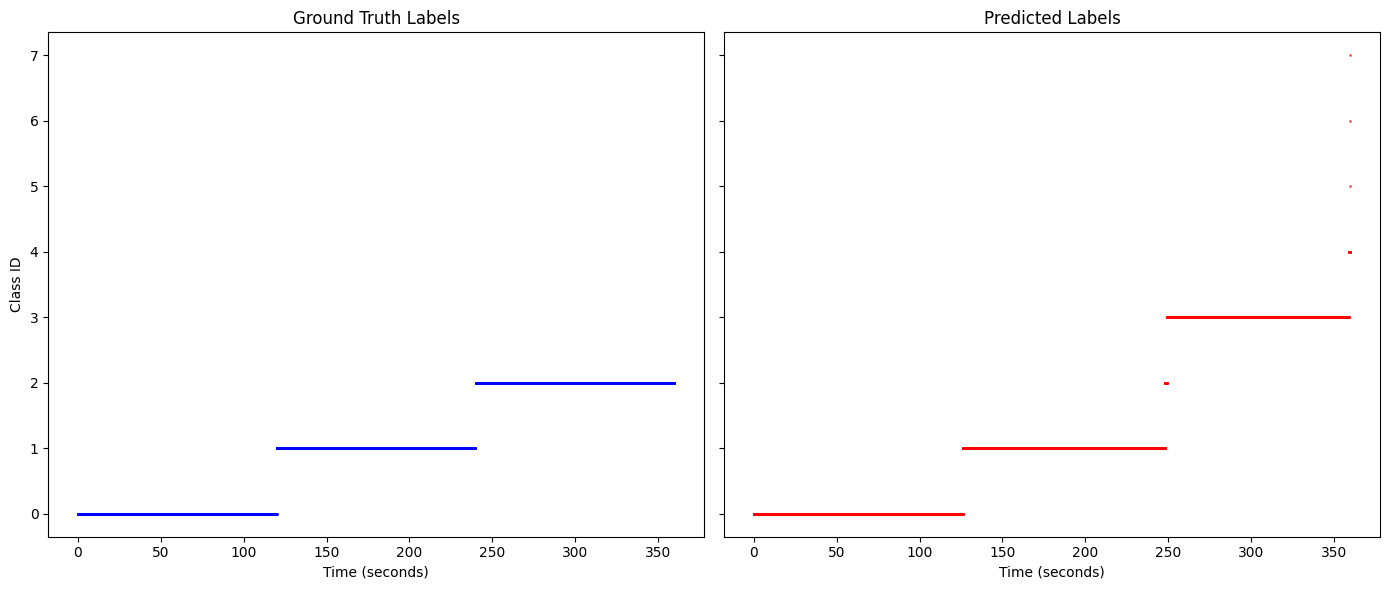

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[ 798    0    0    1    0 1914    0    0    0    0]
 [  58 2591    4    0    0    3    3    0    0    0]
 [2623    0    0    0    1    0    0    2    1    1]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
0.891


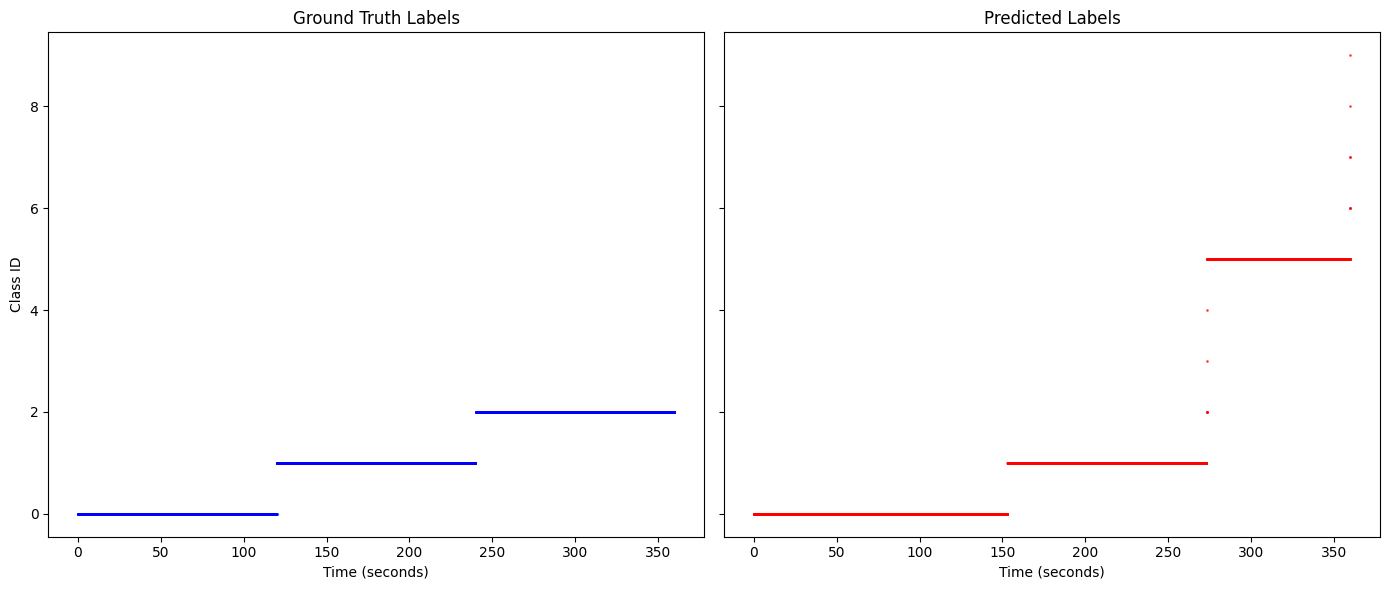

In [52]:
import modules.ART2Clusterer
importlib.reload(modules.ART2Clusterer)
from modules.ART2Clusterer import ART2Clusterer
import pandas as pd

for i in range(5):
    df = pd.read_csv(f'output/time_series_{i}/ground_truth_{i}.csv')
    clusterer = ART2Clusterer(
        vigilance=VIGILANCE, 
        n_features=n_features,
        time_series_index=i
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(conf_matrix)
    print(acc)
    clusterer.plot_truth_vs_time()

In [53]:
from modules.PCA import PCA

pca = PCA('output/selected_features.csv')
dh.generate_pca_csv(pca.projected_data)

time_series_tensor = dh.generate_time_series(
    FRAME_SIZE, 
    HOP_RATIO, 
    filename="pca_features.csv", 
    output_folder="PCA_time_series"
)

pca.projected_data.shape

torch.Size([23973, 26])

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[2624    0    0    0    0    0    0    0    0    0    0    0    0    0
    17    0    0]
 [  91 2478   58    5   19    4    3    0    0    0    0    0    0    0
     0    1    0]
 [ 791   15    1 1699  182    0    1    4    1    1    1    1    1    1
     0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    

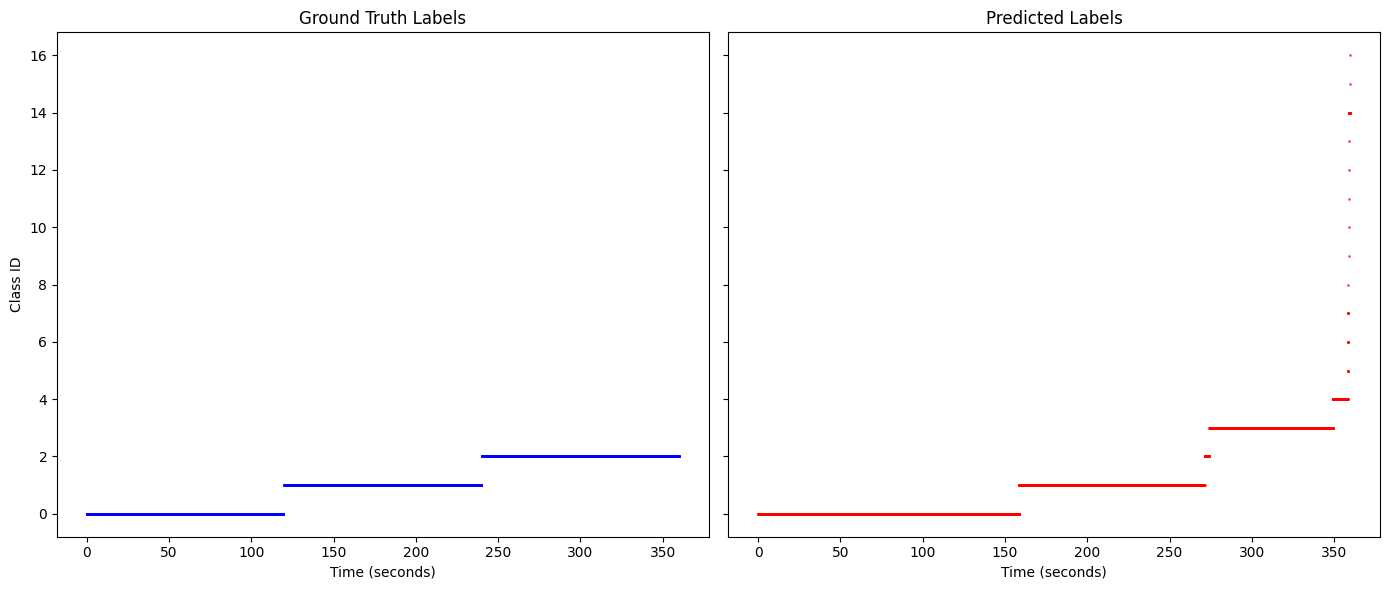

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[2213    0    0    0  489    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 604   23   11    0    0 1986    0    0    0    2    0    0    2    0
     0    0    0]
 [ 296 2354    4    1    0    4    1    1    1    0    1    1    0    3
     1    1    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    

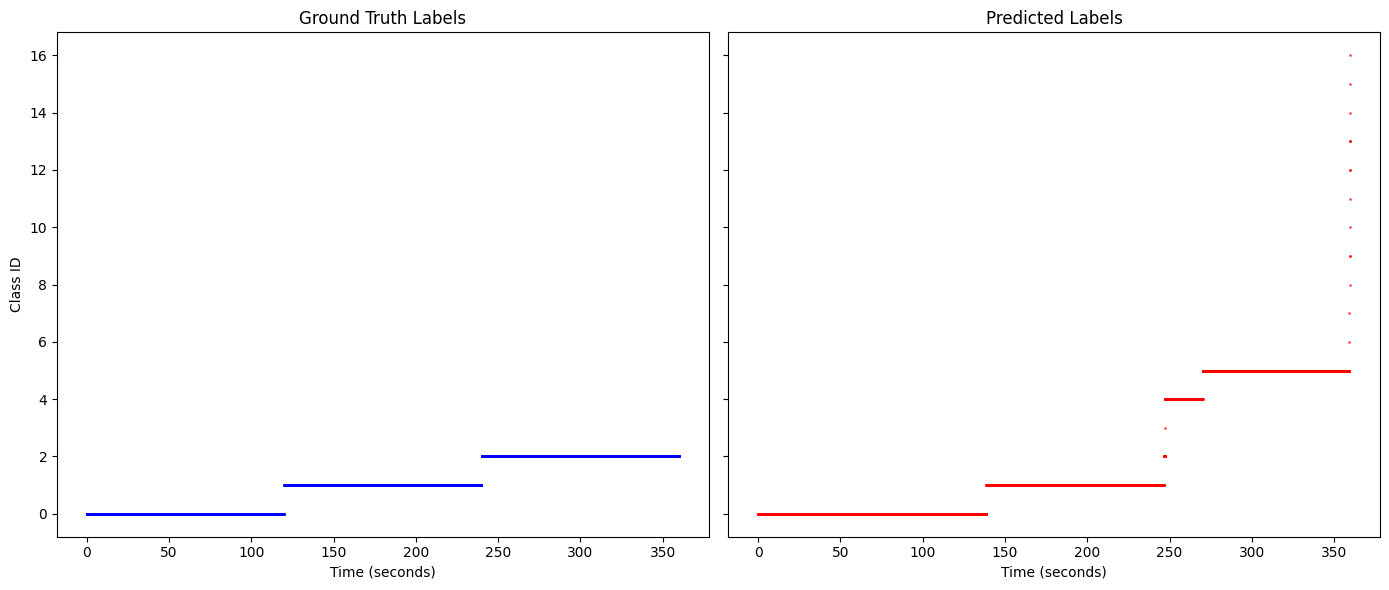

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[2407    0    0    0    0    0    0    0    0  207    0    0]
 [ 152 2498    0    0    0    2    4    1    0    0    2    1]
 [1684   23    5    1    1    0  989   17    4    0    2    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]]
0.73675


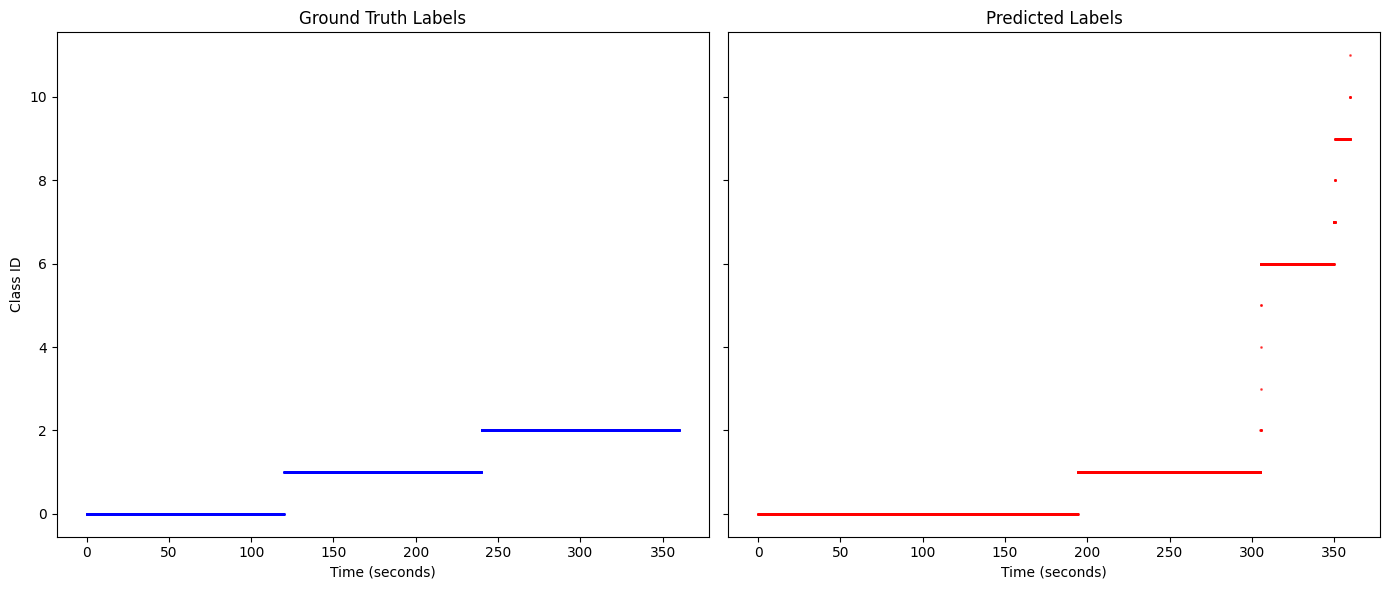

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[ 751    0    0    0    0    0 1928    0    0    0    0    0    0    0
     0    0    0]
 [ 152 2486    1    8    3    0    2    0    2    0    1    0    0    0
     0    0    0]
 [2321   17    0    0    7    1    2    2  293   17    0    1    1    1
     1    1    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    

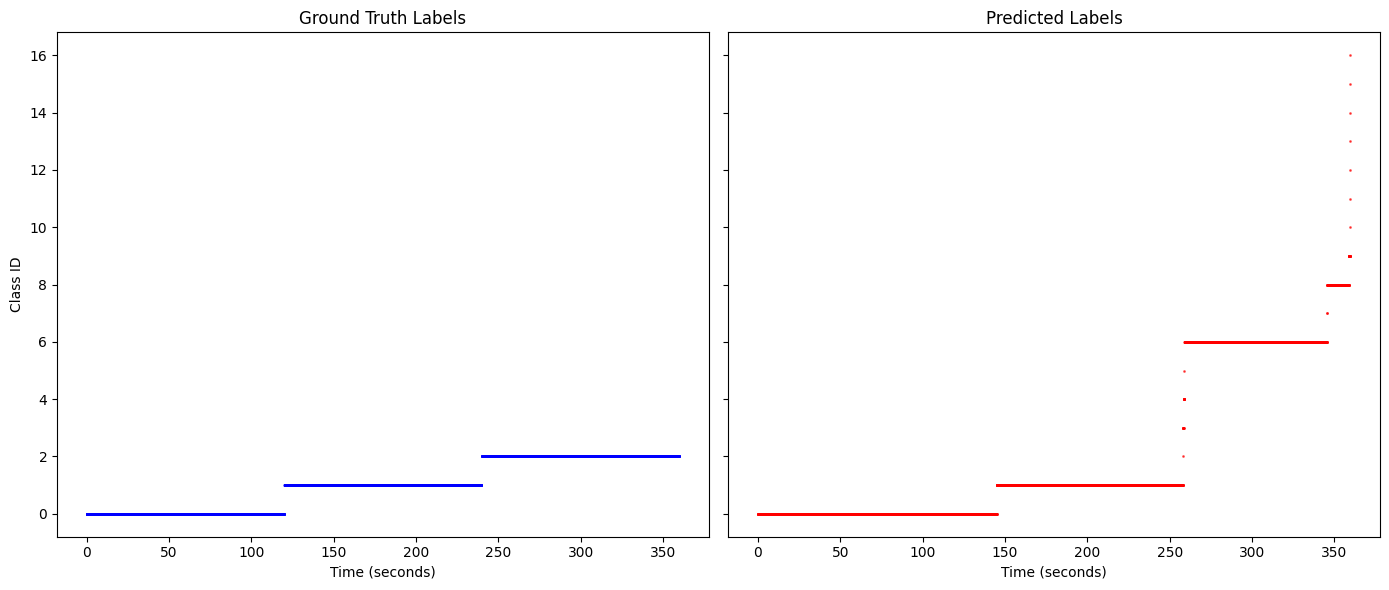

c:\Users\Kennan\projects\online-clustering\modules\ART2Clusterer.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame([data])], ignore_index=True)


[[1931    0    0    0    0    0    0    0  730    0    0    0    0    1
     0    0    0    0]
 [ 134 2445    0    8    0   79    0    0    0    1    0    3    0    0
     2    4    0    0]
 [ 453    3    1 2046    1    1    1    3    0    0    1  147    1    0
     0    0    3    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    

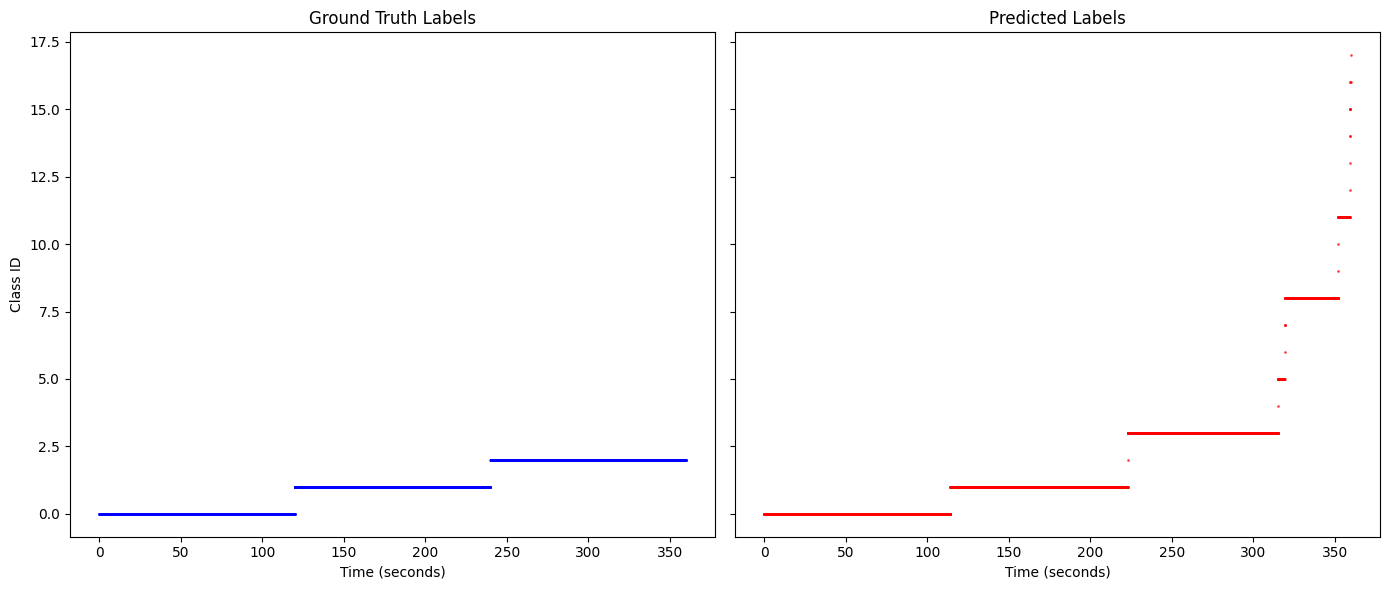

In [54]:
VIGILANCE_PCA = 200

for i in range(5):
    df = pd.read_csv(f'output/PCA_time_series_{i}/ground_truth_{i}.csv')
    clusterer = ART2Clusterer(
        vigilance=VIGILANCE_PCA, 
        n_features=pca.projected_data.shape[1],
        time_series_index=i,
        predicted_filename_prefix="PCA_time_series"
    )
    for index, row in df.iterrows():
        clusterer.fit_clusters(row)

    clusterer.write_to_csv()
    conf_matrix, acc = clusterer.calc_accuracy()
    print(conf_matrix)
    print(acc)
    clusterer.plot_truth_vs_time()